# Global renewable energy analysis - cleaning and EDA

**Objective**

In this notebook we will load the raw dataset 'world_energy_consumption_raw.csv', which is available on Kaggle (https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption). We will clean the dataset, make sure we have the variables we need and they are correctly formatted, and save the new 'cleaned' dataset for further analyses. We will then perform some exploratory data analyses to learn about the shape of the data, the distributions of variables and some initial plots of correlations among key variables.

**Input**

Raw dataset from Kaggle 'world_energy_consumption_raw.csv'

**Output**

- Cleaned dataset saved as a csv file 'world_energy_consumption_cleaned.csv'
- Summary data for the last five years per country saved as a csv file 'world_energy_consumption_last5_summary.csv'


## Load data and libraries

In [1]:
#Check working directory
#change to correct directory if needed
import os
os.chdir('c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis')
current_dir = os.getcwd()
current_dir #show cwd

'c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis'

In [2]:
#load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px

In [3]:
#load data
df_raw = pd.read_csv('./data/world_energy_consumption_raw.csv')
print(df_raw.shape)
df_raw.head()

(22012, 129)


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## Clean data

### Sort out countries

Currently the country column has a mix of countries/continents and duplicated information from different sources e.g. Africa, Africa (EI), Africa (Shift) and Africa (Ember). Below we will create a dictionary of countries from this dataset, and the continent and sub-region they belong to according to the UN classification (https://unstats.un.org/unsd/methodology/m49/). Note these groupings are for statistical purposes and do not imply any political affiliations. We will use this dictionary to subset our data, keeping only the countries listed and creating new columns for wider geographical groupings. 

In [4]:
# get list of countries currently in the dataset
country_list = df_raw['country'].unique().tolist()
#country_list

#remove unwanted countries from the list
# Remove entries containing (Ember), (EI), (EIA) and (Shift) from country_list
country_list = [country for country in country_list if not any(suffix in country for suffix in ['(Ember)', '(EI)', '(Shift)', '(EIA)'])]
#Remove other unwanted entries
unwanted_entries = ['Africa', 'Antarctica', 'Asia', 'Europe', 'European Union (27)', 'High-income countries', 'Low-income countries', 
                    'Lower-middle-income countries', 'Micronesia (country)', 'Netherlands Antilles', 'North America', 'Oceania', 
                    'Serbia and Montenegro', 'South America', 'USSR', 'Upper-middle-income countries', 'Western Sahara', 'World', 
                    'Yugoslavia']
country_list = [country for country in country_list if country not in unwanted_entries]
#country_list

#filter dataframe to include only wanted countries
df = df_raw[df_raw['country'].isin(country_list)].copy()
print(df.shape)
df.head()

(16460, 129)


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now add continent and sub-region columns for each country

In [7]:
#create a dictionary mapping countries to continents and sub-regions
#copilot generated this dictionary based on UN geoscheme,
country_dict = {
    # Africa
    'Algeria': ['Africa', 'Northern Africa'],
    'Angola': ['Africa', 'Middle Africa'],
    'Benin': ['Africa', 'Western Africa'],
    'Botswana': ['Africa', 'Southern Africa'],
    'Burkina Faso': ['Africa', 'Western Africa'],
    'Burundi': ['Africa', 'Eastern Africa'],
    'Cameroon': ['Africa', 'Middle Africa'],
    'Cape Verde': ['Africa', 'Western Africa'],
    'Central African Republic': ['Africa', 'Middle Africa'],
    'Chad': ['Africa', 'Middle Africa'],
    'Comoros': ['Africa', 'Eastern Africa'],
    'Congo': ['Africa', 'Middle Africa'],
    'Democratic Republic of Congo': ['Africa', 'Middle Africa'],
    "Cote d'Ivoire": ['Africa', 'Western Africa'],
    'Djibouti': ['Africa', 'Eastern Africa'],
    'Egypt': ['Africa', 'Northern Africa'],
    'Equatorial Guinea': ['Africa', 'Middle Africa'],
    'Eritrea': ['Africa', 'Eastern Africa'],
    'Ethiopia': ['Africa', 'Eastern Africa'],
    'Gabon': ['Africa', 'Middle Africa'],
    'Gambia': ['Africa', 'Western Africa'],
    'Ghana': ['Africa', 'Western Africa'],
    'Guinea': ['Africa', 'Western Africa'],
    'Guinea-Bissau': ['Africa', 'Western Africa'],
    'Kenya': ['Africa', 'Eastern Africa'],
    'Lesotho': ['Africa', 'Southern Africa'],
    'Liberia': ['Africa', 'Western Africa'],
    'Libya': ['Africa', 'Northern Africa'],
    'Madagascar': ['Africa', 'Eastern Africa'],
    'Malawi': ['Africa', 'Eastern Africa'],
    'Mali': ['Africa', 'Western Africa'],
    'Mauritania': ['Africa', 'Western Africa'],
    'Mauritius': ['Africa', 'Eastern Africa'],
    'Morocco': ['Africa', 'Northern Africa'],
    'Mozambique': ['Africa', 'Eastern Africa'],
    'Namibia': ['Africa', 'Southern Africa'],
    'Niger': ['Africa', 'Western Africa'],
    'Nigeria': ['Africa', 'Western Africa'],
    'Rwanda': ['Africa', 'Eastern Africa'],
    'Senegal': ['Africa', 'Western Africa'],
    'Seychelles': ['Africa', 'Eastern Africa'],
    'Sierra Leone': ['Africa', 'Western Africa'],
    'Somalia': ['Africa', 'Eastern Africa'],
    'South Africa': ['Africa', 'Southern Africa'],
    'South Sudan': ['Africa', 'Eastern Africa'],
    'Sudan': ['Africa', 'Northern Africa'],
    'Swaziland': ['Africa', 'Southern Africa'],
    'Tanzania': ['Africa', 'Eastern Africa'],
    'Togo': ['Africa', 'Western Africa'],
    'Tunisia': ['Africa', 'Northern Africa'],
    'Uganda': ['Africa', 'Eastern Africa'],
    'Zambia': ['Africa', 'Eastern Africa'],
    'Zimbabwe': ['Africa', 'Eastern Africa'],
    'Eswatini': ['Africa', 'Southern Africa'], #updated name
    'Saint Helena': ['Africa', 'Middle Africa'], #added in
    'Sao Tome and Principe': ['Africa', 'Middle Africa'], #added in
    'Reunion': ['Africa', 'Eastern Africa'], #added in

    # Asia
    'Afghanistan': ['Asia', 'Southern Asia'],
    'Armenia': ['Asia', 'Western Asia'],
    'Azerbaijan': ['Asia', 'Western Asia'], ##double check this one
    'Bahrain': ['Asia', 'Western Asia'],
    'Bangladesh': ['Asia', 'Southern Asia'],
    'Bhutan': ['Asia', 'Southern Asia'],
    'Brunei': ['Asia', 'South-Eastern Asia'],
    'Cambodia': ['Asia', 'South-Eastern Asia'],
    'China': ['Asia', 'Eastern Asia'],
    'Cyprus': ['Asia', 'Western Asia'], #double check
    'Georgia': ['Asia', 'Western Asia'],#double check
    'India': ['Asia', 'Southern Asia'],
    'Indonesia': ['Asia', 'South-Eastern Asia'],
    'Iran': ['Asia', 'Southern Asia'],
    'Iraq': ['Asia', 'Western Asia'],
    'Israel': ['Asia', 'Western Asia'],
    'Japan': ['Asia', 'Eastern Asia'],
    'Jordan': ['Asia', 'Western Asia'],
    'Kazakhstan': ['Asia', 'Central Asia'],
    'Kuwait': ['Asia', 'Western Asia'],
    'Kyrgyzstan': ['Asia', 'Central Asia'],
    'Laos': ['Asia', 'South-Eastern Asia'],
    'Lebanon': ['Asia', 'Western Asia'],
    'Malaysia': ['Asia', 'South-Eastern Asia'],
    'Maldives': ['Asia', 'Southern Asia'],
    'Mongolia': ['Asia', 'Eastern Asia'],
    'Myanmar': ['Asia', 'South-Eastern Asia'],
    'Nepal': ['Asia', 'Southern Asia'],
    'North Korea': ['Asia', 'Eastern Asia'],
    'Oman': ['Asia', 'Western Asia'],
    'Pakistan': ['Asia', 'Southern Asia'],
    'Palestine': ['Asia', 'Western Asia'],
    'Philippines': ['Asia', 'South-Eastern Asia'],
    'Qatar': ['Asia', 'Western Asia'],
    'Saudi Arabia': ['Asia', 'Western Asia'],
    'Singapore': ['Asia', 'South-Eastern Asia'],
    'South Korea': ['Asia', 'Eastern Asia'],
    'Sri Lanka': ['Asia', 'Southern Asia'],
    'Syria': ['Asia', 'Western Asia'],
    'Taiwan': ['Asia', 'Eastern Asia'],
    'Tajikistan': ['Asia', 'Central Asia'],
    'Thailand': ['Asia', 'South-Eastern Asia'],
    'East Timor': ['Asia', 'South-Eastern Asia'],#double check (changed to east timor)
    'Turkey': ['Asia', 'Western Asia'],#double check
    'Turkmenistan': ['Asia', 'Central Asia'],
    'United Arab Emirates': ['Asia', 'Western Asia'],
    'Uzbekistan': ['Asia', 'Central Asia'],
    'Vietnam': ['Asia', 'South-Eastern Asia'],
    'Yemen': ['Asia', 'Western Asia'],
    'Hong Kong': ['Asia', 'Eastern Asia'],#added in
    'Macao': ['Asia', 'Eastern Asia'],#added in

    # Europe
    'Albania': ['Europe', 'Southern Europe'],
    'Andorra': ['Europe', 'Southern Europe'],
    'Austria': ['Europe', 'Western Europe'],
    'Belarus': ['Europe', 'Eastern Europe'],
    'Belgium': ['Europe', 'Western Europe'],
    'Bosnia and Herzegovina': ['Europe', 'Southern Europe'],
    'Bulgaria': ['Europe', 'Eastern Europe'],
    'Croatia': ['Europe', 'Southern Europe'],
    'Czech Republic': ['Europe', 'Eastern Europe'],
    'Denmark': ['Europe', 'Northern Europe'],
    'Estonia': ['Europe', 'Northern Europe'],
    'Finland': ['Europe', 'Northern Europe'],
    'France': ['Europe', 'Western Europe'],
    'Germany': ['Europe', 'Western Europe'],
    'Greece': ['Europe', 'Southern Europe'],
    'Hungary': ['Europe', 'Eastern Europe'],
    'Iceland': ['Europe', 'Northern Europe'],
    'Ireland': ['Europe', 'Northern Europe'],
    'Italy': ['Europe', 'Southern Europe'],
    'Latvia': ['Europe', 'Northern Europe'],
    'Liechtenstein': ['Europe', 'Western Europe'],
    'Lithuania': ['Europe', 'Northern Europe'],
    'Luxembourg': ['Europe', 'Western Europe'],
    'Malta': ['Europe', 'Southern Europe'],
    'Moldova': ['Europe', 'Eastern Europe'],
    'Monaco': ['Europe', 'Western Europe'],
    'Montenegro': ['Europe', 'Southern Europe'],
    'Netherlands': ['Europe', 'Western Europe'],
    'North Macedonia': ['Europe', 'Southern Europe'],
    'Norway': ['Europe', 'Northern Europe'],
    'Poland': ['Europe', 'Eastern Europe'],
    'Portugal': ['Europe', 'Southern Europe'],
    'Romania': ['Europe', 'Eastern Europe'],
    'Russia': ['Europe', 'Eastern Europe'],
    'San Marino': ['Europe', 'Southern Europe'],
    'Serbia': ['Europe', 'Southern Europe'],
    'Slovakia': ['Europe', 'Eastern Europe'],
    'Slovenia': ['Europe', 'Southern Europe'],
    'Spain': ['Europe', 'Southern Europe'],
    'Sweden': ['Europe', 'Northern Europe'],
    'Switzerland': ['Europe', 'Western Europe'],
    'Ukraine': ['Europe', 'Eastern Europe'],
    'United Kingdom': ['Europe', 'Northern Europe'],
    'Vatican City': ['Europe', 'Southern Europe'],
    'Faroe Islands': ['Europe', 'Northern Europe'], #added in
    'Kosovo': ['Europe', 'Southern Europe'], #added in
    'Czechia': ['Europe', 'Eastern Europe'], #added in
    'Czechoslovakia': ['Europe', 'Eastern Europe'], #added in
    'Gibraltar': ['Europe', 'Southern Europe'], #added in

    # North America
    'Antigua and Barbuda': ['North America', 'Caribbean'],
    'Bahamas': ['North America', 'Caribbean'],
    'Barbados': ['North America', 'Caribbean'],
    'Belize': ['North America', 'Central America'],
    'Canada': ['North America', 'Northern America'],
    'Costa Rica': ['North America', 'Central America'],
    'Cuba': ['North America', 'Caribbean'],
    'Dominica': ['North America', 'Caribbean'],
    'Dominican Republic': ['North America', 'Caribbean'],
    'El Salvador': ['North America', 'Central America'],
    'Grenada': ['North America', 'Caribbean'],
    'Guatemala': ['North America', 'Central America'],
    'Haiti': ['North America', 'Caribbean'],
    'Honduras': ['North America', 'Central America'],
    'Jamaica': ['North America', 'Caribbean'],
    'Mexico': ['North America', 'Central America'],
    'Nicaragua': ['North America', 'Central America'],
    'Panama': ['North America', 'Central America'],
    'Saint Kitts and Nevis': ['North America', 'Caribbean'],
    'Saint Lucia': ['North America', 'Caribbean'],
    'Saint Vincent and the Grenadines': ['North America', 'Caribbean'],
    'Trinidad and Tobago': ['North America', 'Caribbean'],
    'United States': ['North America', 'Northern America'],
    'Aruba': ['North America', 'Caribbean'], #added in
    'Bermuda': ['North America', 'Northern America'], #added in
    'British Virgin Islands': ['North America', 'Caribbean'], #added in
    'Greenland': ['North America', 'Northern America'], #added in
    'Guadeloupe': ['North America', 'Caribbean'], #added in
    'Martinique': ['North America', 'Caribbean'], #added in
    'Montserrat': ['North America', 'Caribbean'], #added in
    'Saint Pierre and Miquelon': ['North America', 'Northern America'], #added in
    'Turks and Caicos Islands': ['North America', 'Caribbean'], #added in
    'Cayman Islands': ['North America', 'Caribbean'], #added in
    'Puerto Rico': ['North America', 'Caribbean'], #added in
    'United States Virgin Islands': ['North America', 'Caribbean'], #added in


    # South America
    'Argentina': ['South America', 'South America'],
    'Bolivia': ['South America', 'South America'],
    'Brazil': ['South America', 'South America'],
    'Chile': ['South America', 'South America'],
    'Colombia': ['South America', 'South America'],
    'Ecuador': ['South America', 'South America'],
    'Guyana': ['South America', 'South America'],
    'Paraguay': ['South America', 'South America'],
    'Peru': ['South America', 'South America'],
    'Suriname': ['South America', 'South America'],
    'Uruguay': ['South America', 'South America'],
    'Venezuela': ['South America', 'South America'],
    'Falkland Islands': ['South America', 'South America'], #added in
    'French Guiana': ['South America', 'South America'], #added in

    # Oceania
    'Australia': ['Oceania', 'Australia and New Zealand'],
    'Fiji': ['Oceania', 'Melanesia'],
    'Kiribati': ['Oceania', 'Micronesia'],
    'Marshall Islands': ['Oceania', 'Micronesia'],
    'Nauru': ['Oceania', 'Micronesia'],
    'New Zealand': ['Oceania', 'Australia and New Zealand'],
    'Palau': ['Oceania', 'Micronesia'],
    'Papua New Guinea': ['Oceania', 'Melanesia'],
    'Samoa': ['Oceania', 'Polynesia'],
    'Solomon Islands': ['Oceania', 'Melanesia'],
    'Tonga': ['Oceania', 'Polynesia'],
    'Tuvalu': ['Oceania', 'Polynesia'],
    'Vanuatu': ['Oceania', 'Melanesia'],
    'American Samoa': ['Oceania', 'Polynesia'], #added in
    'Cook Islands': ['Oceania', 'Polynesia'], #added in
    'French Polynesia': ['Oceania', 'Polynesia'], #added in
    'Guam': ['Oceania', 'Micronesia'], #added in
    'New Caledonia': ['Oceania', 'Melanesia'], #added
    'Niue': ['Oceania', 'Polynesia'], #added in
    'Northern Mariana Islands': ['Oceania', 'Micronesia'], #added in
} 

# build mapping DataFrame and merge
mapping_df = pd.DataFrame.from_dict(country_dict, orient='index', columns=['continent', 'sub_region'])
mapping_df.index.name = 'country'
mapping_df = mapping_df.reset_index()

df = df.merge(mapping_df, on='country', how='left')

# report unmapped countries so you can correct/match them
unmapped = sorted(df.loc[df['continent'].isna(), 'country'].unique())
if len(unmapped):
    print('Unmapped countries (need review):', unmapped)
else:
    print('All countries mapped.')

df.head()
print(df.shape)

All countries mapped.
(16460, 135)


### Filter columns

Now we have the countries sorted! Let's filter out the columns that we won't be using.

We want to analyse energy consumption and production per capita, as this incorporates population size and therefore is more comparable across countries

In [8]:
#list columns in the dataframe
# list columns in the dataframe
cols = df.columns.tolist()
print(f"Total columns: {len(cols)}")
cols

Total columns: 135


['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [9]:
#elec = electricity generated
#energy = energy consumption

#list of columns to keep
columns_to_keep = [
    #metadata
    'country', 'iso_code', 'year', 'population','gdp', 'continent', 'sub_region',
    'per_capita_electricity', 'energy_per_capita', 'energy_per_gdp',
    #renewables
    'biofuel_cons_per_capita', 'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_elec', 'biofuel_share_energy',
    'hydro_elec_per_capita', 'hydro_energy_per_capita', 'hydro_cons_change_pct', 'hydro_share_elec', 'hydro_share_energy',
    'nuclear_elec_per_capita', 'nuclear_energy_per_capita', 'nuclear_cons_change_pct', 'nuclear_share_elec', 'nuclear_share_energy',
    'solar_elec_per_capita', 'solar_energy_per_capita', 'solar_cons_change_pct', 'solar_share_elec', 'solar_share_energy',
    'wind_elec_per_capita', 'wind_energy_per_capita', 'wind_cons_change_pct', 'wind_share_elec', 'wind_share_energy',
    #combined into renewable (biofuel, hydro, nuclear, solar, wind)
    'renewables_elec_per_capita', 'renewables_energy_per_capita', 'renewables_cons_change_pct',
    'renewables_share_energy', 'renewables_share_elec',
    #non-renewables (gas, oil and coal combined into fossil)
    'fossil_elec_per_capita', 'fossil_energy_per_capita', 'fossil_cons_change_pct', 
    'fossil_share_energy', 'fossil_share_elec',
    
                    ]

df = df[columns_to_keep].copy()

print(df.shape)
df.head()

(16460, 45)


,country,iso_code,year,population,gdp,continent,sub_region,per_capita_electricity,energy_per_capita,energy_per_gdp,...,renewables_elec_per_capita,renewables_energy_per_capita,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec
0,Afghanistan,AFG,1900,4707744.0,NaN,Asia,Southern Asia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4751177.0,NaN,Asia,Southern Asia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4802500.0,NaN,Asia,Southern Asia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4861833.0,NaN,Asia,Southern Asia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,4921891.0,NaN,Asia,Southern Asia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing data

Still lot's of missing data, some countries have more records for certain fuels than others. What to do about this?
Let's look column by column. 

We've removed a lot of rows that don't match our country list (from 22012). However, we still have a lot of missing data, the majority of which is due to entries from prior to 1980's when records weren't that great, so let's remove these rows too.

In [10]:
#keep rows where year is 1982 onwards (so we have 40 years of data up to 2022)
df = df[df['year'] >= 1982].copy()
print(df.shape)

(8507, 45)


Some countries have no information on gdp, nothing much can be done about that. But a lot of countries have missing gdp data for 2019-2022, we could forward fill this from the gdp of the last year where it is known (e.g. 2018). This will be a rough guess but likely to be an underestimate.

In [11]:
#for each country, forward fill gdp values
df['gdp'] = df.groupby('country')['gdp'].ffill()
#do the same for energy_per_gdp
df['energy_per_gdp'] = df.groupby('country')['energy_per_gdp'].ffill()
print(df.shape)
df.head()

(8507, 45)


,country,iso_code,year,population,gdp,continent,sub_region,per_capita_electricity,energy_per_capita,energy_per_gdp,...,renewables_elec_per_capita,renewables_energy_per_capita,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec
82,Afghanistan,AFG,1982,10088290.0,1.598041e+10,Asia,Southern Asia,NaN,926.651,0.585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Afghanistan,AFG,1983,9951447.0,1.675533e+10,Asia,Southern Asia,NaN,1149.196,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Afghanistan,AFG,1984,10243689.0,1.707215e+10,Asia,Southern Asia,NaN,1121.573,0.673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,AFG,1985,10512220.0,1.710848e+10,Asia,Southern Asia,NaN,1067.071,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Afghanistan,AFG,1986,10448447.0,1.764135e+10,Asia,Southern Asia,NaN,1097.040,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For fuels, we have missing and 0 values in some cells especially for earlier years. As there are 0 values in some cases, it would be wrong to assume that missing values can be filled in as 0. For some countries, records aren't available until 2000. We'll keep it as is for now and explore the data further, but for some analyses we might want to focus on 2000 onwards, or on the countries with the most complete data.

We might also want the data in long format for analyses/plotting i.e. a column for fuel type and then one for per capita production, consumption etc. We can do that later if needed!

### Format variables

Let's make sure the variables are coded correctly (as numerical or categorical etc.)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8507 entries, 82 to 16459
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       8507 non-null   object 
 1   iso_code                      8473 non-null   object 
 2   year                          8507 non-null   int64  
 3   population                    8507 non-null   float64
 4   gdp                           6537 non-null   float64
 5   continent                     8507 non-null   object 
 6   sub_region                    8507 non-null   object 
 7   per_capita_electricity        5983 non-null   float64
 8   energy_per_capita             8412 non-null   float64
 9   energy_per_gdp                6520 non-null   float64
 10  biofuel_cons_per_capita       1631 non-null   float64
 11  biofuel_elec_per_capita       4988 non-null   float64
 12  biofuel_cons_change_pct       1037 non-null   float64
 13  biofue

All variables are in the correct format, no adjustments needed!

### Five-year summaries

For our hypotheses and visualisations, we need to summarise the energy consumption and production data for the most recent 5 years (2017-2022). We will calculate the total (sum) energy share and averages (mean) of production per capita and annual growth for each type of energy, as well as averages for gdp.

In [16]:
#calculate summary statistics for numeric columns over the last 5 years per country

#first filter the the last 5 years and group by country
df_last5 = df[df['year'] >= df['year'].max() - 4].copy()
#sum and mean of energy share, per capita and change pct columns per country
cols_to_agg = [
    'gdp', 'biofuel_cons_change_pct', 'biofuel_share_elec', 'biofuel_share_energy',
    'hydro_cons_change_pct', 'hydro_share_elec', 'hydro_share_energy',
    'nuclear_cons_change_pct', 'nuclear_share_elec', 'nuclear_share_energy',
    'solar_cons_change_pct', 'solar_share_elec', 'solar_share_energy',
    'wind_cons_change_pct', 'wind_share_elec', 'wind_share_energy',
    'fossil_cons_change_pct', 'fossil_share_energy', 'fossil_share_elec',
    'renewables_cons_change_pct', 'renewables_share_energy', 'renewables_share_elec'
]

df_last5_sum = df_last5.groupby('country')[cols_to_agg].agg(['mean', 'sum']).reset_index()

# flatten multiindex columns for easier use
df_last5_sum.columns = [c if isinstance(c, str) else f"{c[0]}_{c[1]}" for c in df_last5_sum.columns.values]

df_last5_sum.head()
    

,country_,gdp_mean,gdp_sum,biofuel_cons_change_pct_mean,biofuel_cons_change_pct_sum,biofuel_share_elec_mean,biofuel_share_elec_sum,biofuel_share_energy_mean,biofuel_share_energy_sum,hydro_cons_change_pct_mean,...,fossil_share_energy_mean,fossil_share_energy_sum,fossil_share_elec_mean,fossil_share_elec_sum,renewables_cons_change_pct_mean,renewables_cons_change_pct_sum,renewables_share_energy_mean,renewables_share_energy_sum,renewables_share_elec_mean,renewables_share_elec_sum
0,Afghanistan,6.759497e+10,2.703799e+11,NaN,0.0,0.00000,0.000,NaN,0.0,NaN,...,NaN,0.000,16.14475,64.579,NaN,0.000,NaN,0.00,83.85525,335.421
1,Albania,3.400911e+10,1.360365e+11,NaN,0.0,0.00000,0.000,NaN,0.0,NaN,...,NaN,0.000,0.00000,0.000,NaN,0.000,NaN,0.00,100.00000,400.000
2,Algeria,5.903180e+11,2.951590e+12,NaN,0.0,0.00000,0.000,NaN,0.0,143.1634,...,99.7138,498.569,98.91475,395.659,6.5274,32.637,0.286,1.43,1.03600,5.180
3,American Samoa,NaN,0.000000e+00,NaN,0.0,0.00000,0.000,NaN,0.0,NaN,...,NaN,0.000,100.00000,400.000,NaN,0.000,NaN,0.00,0.00000,0.000
4,Angola,1.759300e+11,8.796500e+11,NaN,0.0,0.79525,3.181,NaN,0.0,NaN,...,NaN,0.000,26.84375,107.375,NaN,0.000,NaN,0.00,73.15625,292.625


### Save data

We now have a processed dataset containing data from 1982-2022, for 217 countries. The data has 8507 rows and 45 columns, including energy consumption and production per capita in kilowatt hours per person. Let's save this as a new 'clean' csv file for downstream analyses. We'll also save the 5 year summary data for later.

In [17]:
#save cleaned data to new csv
df.to_csv('./data/world_energy_consumption_cleaned.csv', index=False)

#save 5 year summary stats to new csv
df_last5_sum.to_csv('./data/world_energy_consumption_last5_summary.csv', index=False)

## Exploratory data analysis

### Summary stats
Let's visualise the shape of our data and get an initial idea of distributions, patterns and correlations. We'll start with an overview of summary statistics per column. This include information such as the number of categories, most common category (for categorical data), average, min and max for numerical data.

In [17]:
df.describe(include='all')

,country,iso_code,year,population,gdp,continent,sub_region,per_capita_electricity,energy_per_capita,energy_per_gdp,...,renewables_elec_per_capita,renewables_energy_per_capita,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec
count,8507,8473,8507.000000,8.507000e+03,6.537000e+03,8507,8507,5983.000000,8412.000000,6520.000000,...,5931.000000,2989.000000,2855.000000,2688.000000,5687.000000,5494.000000,2852.000000,2901.000000,2688.000000,5365.000000
unique,217,215,NaN,NaN,NaN,6,22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,ZWE,NaN,NaN,NaN,Africa,Caribbean,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,41,NaN,NaN,NaN,2207,877,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.127777,3.016728e+07,4.407475e+11,NaN,NaN,3862.246351,25451.053289,1.723741,...,1184.845198,5560.041730,11.704661,11.513619,30.195801,2298.262467,33143.250122,1.570259,83.744160,64.744528
std,NaN,NaN,11.597156,1.208531e+08,1.494988e+12,NaN,NaN,5077.460042,37583.208803,1.757592,...,4023.019762,15383.782783,151.729221,13.296131,32.244069,3017.973413,29955.555813,6.539172,15.481476,33.130682
min,NaN,NaN,1982.000000,1.833000e+03,1.918080e+08,NaN,NaN,0.000000,0.000000,0.078000,...,0.000000,0.000000,-92.641000,0.000000,0.000000,0.000000,419.929000,-46.222000,25.698000,0.000000
25%,NaN,NaN,1992.000000,6.985395e+05,1.703577e+10,NaN,NaN,559.796000,2790.161500,0.829000,...,11.471000,347.924000,-3.142000,2.193250,1.517000,176.943500,15105.165500,-1.578000,76.537750,39.036000
50%,NaN,NaN,2002.000000,5.411686e+06,5.733825e+10,NaN,NaN,2343.477000,12845.071000,1.244000,...,187.229000,1214.725000,3.996000,6.361000,16.884000,1228.471000,26610.040500,1.492000,87.547500,72.759000
75%,NaN,NaN,2012.000000,1.880143e+07,2.652370e+11,NaN,NaN,5379.111500,34130.085250,2.067250,...,829.508000,3722.781000,14.553500,16.812500,53.989500,3400.782250,40743.676750,5.067000,95.985000,96.747000


### Numerical variable distribution
Now let's take a closer look at the distribution of the numerical variables

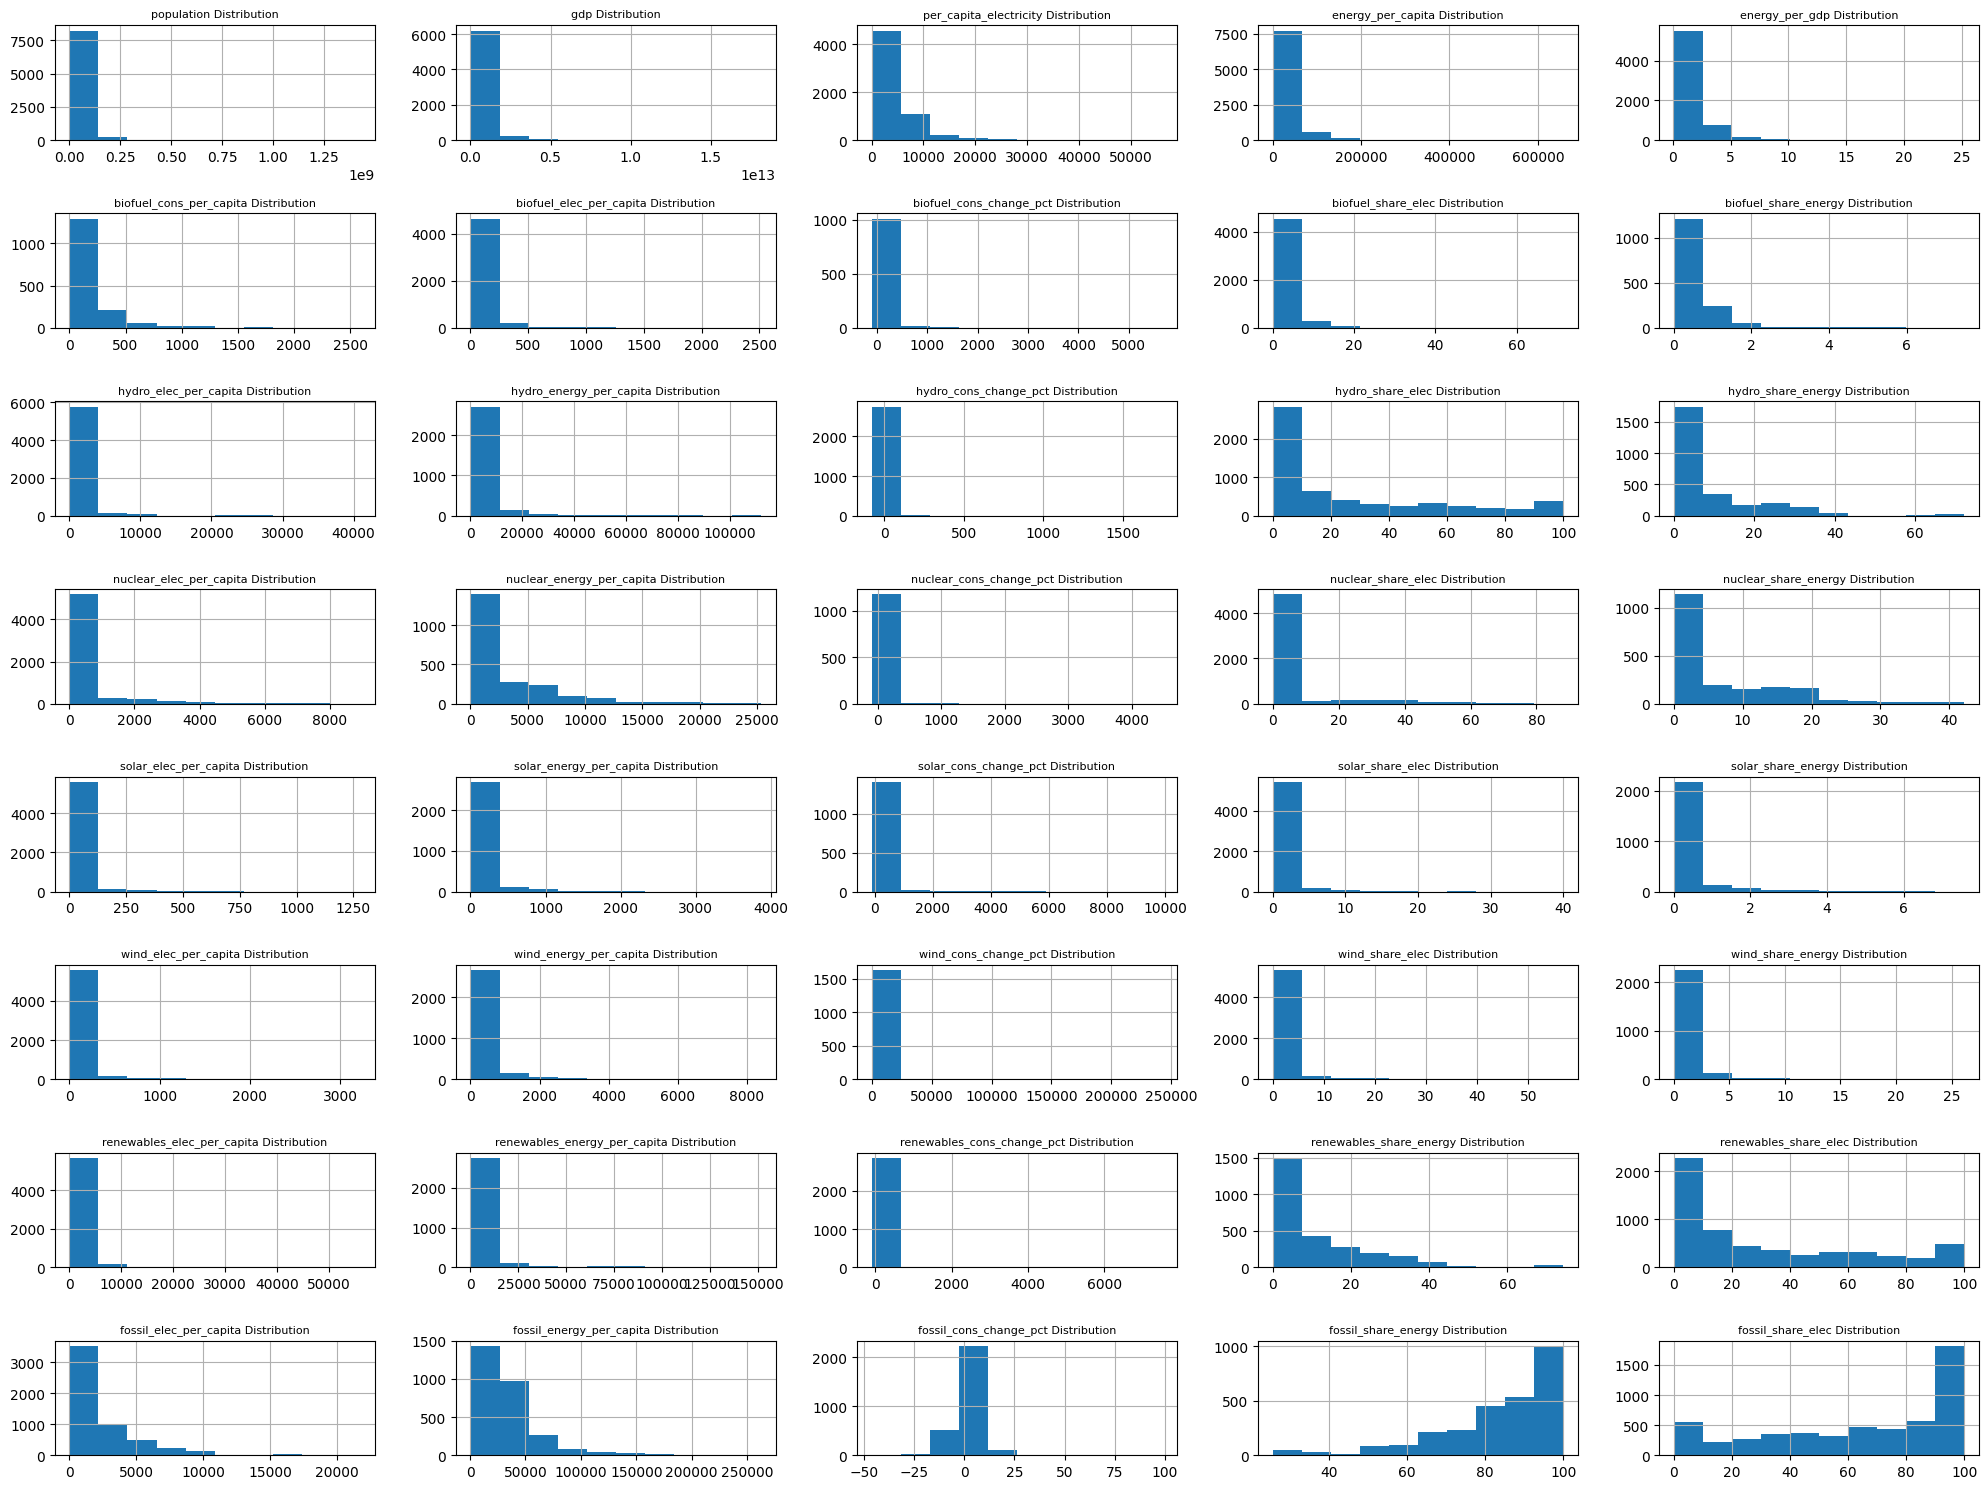

In [ ]:
#get numerical columns
num_cols = df.select_dtypes(include=['float64']).columns #identify categorical variables
#len(num_cols)

def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20, 15))  # Increased figure size
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution", fontsize=8)  # Reduced font size
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df, df[num_cols], 8, 5)

All energy variables are highly right-skewed, meaning most of the datapoints (energy value per capita) are at the lower end of the range and there is a long tail with fewer datapoints having larger values. The exception is the fossil fuel share of energy and electricity, which is left-skewed i.e. the majority of countries/years have high percentage fossil fuel shares of energy/electricity. There will likely be lots of datapoints identified as outliers due to these skewed distributions. However, after examining the data there is no reason to suggest that these are erroneous or that these datapoints should be altered. We might for specific analyses want to transform some of the variables e.g. log transform, this can be done later if needed, prior to fitting the model.

### Variable correlations

Now let's examine the correlation among energy consumption and production variables in a pairplot, combining scatterplots, histograms of distributions and a heatmap of Pearson correlation coefficients (code adapted from here: https://stackoverflow.com/questions/66108908/how-to-combine-a-pairplot-and-a-triangular-heatmap).

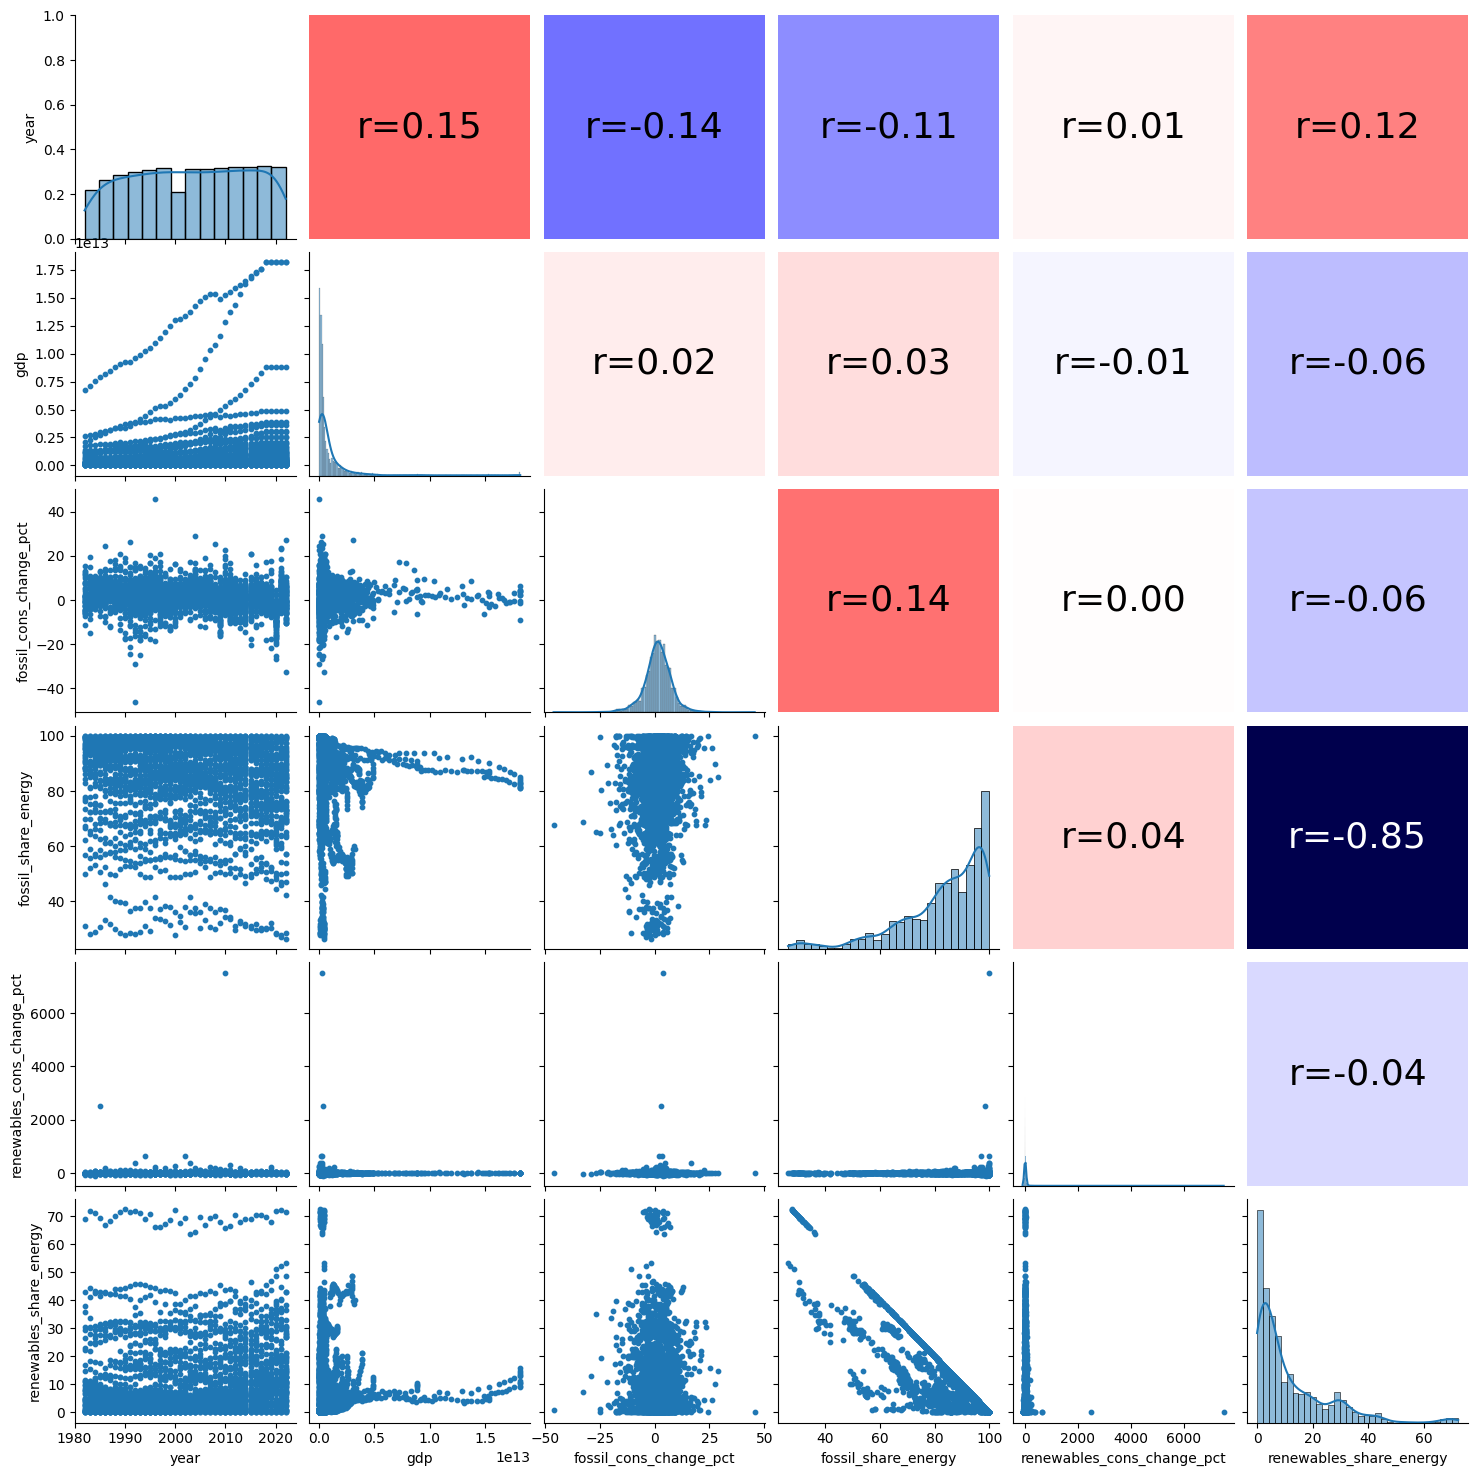

In [28]:
from scipy.stats import pearsonr

#select columns for pairplot and drop rows with any NaN values
select_cols = ['year','gdp', 'fossil_cons_change_pct', 'fossil_share_energy',
               'renewables_cons_change_pct', 'renewables_share_energy']
df_clean = df[select_cols].dropna()

#define a function to calculate and display correlation coefficient in upper triangle of pairplot
def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']#get colormap
    norm = kwds['norm']#get normalization
    ax = plt.gca()#get current axis
    ax.tick_params(bottom=False, top=False, left=False, right=False)#remove ticks
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)#remove spines
    
    # Only calculate correlation if there are valid pairs of data
    mask = ~(np.isnan(x) | np.isnan(y))
    if mask.sum() > 1:  # Need at least 2 pairs for correlation
        r, _ = pearsonr(x[mask], y[mask])
        facecolor = cmap(norm(r))
        ax.set_facecolor(facecolor)
        lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
        ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                   color='white' if lightness < 0.7 else 'black', size=26, 
                   ha='center', va='center')
    else:
        ax.set_facecolor('white')
        ax.annotate("N/A", xy=(.5, .5), xycoords=ax.transAxes,
                   color='black', size=26, ha='center', va='center')

#creating the pairplot with clean data
g = sns.PairGrid(df_clean)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=True)
g.map_upper(corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-.5, vmax=.5))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06)
plt.show()

- renewable and fossil fuel shares of energy consumption are tightly linked, as expected.
- gdp growth over time shows variation (probably among countries)
- gdp shows an interesting relationship with energy shares and percentage change in fossil fuel consumption, hinting that there might be another factor influencing this relationship (linked to hypothesis 1)

### Global patterns

Let's finish by plotting some global trends in renewables

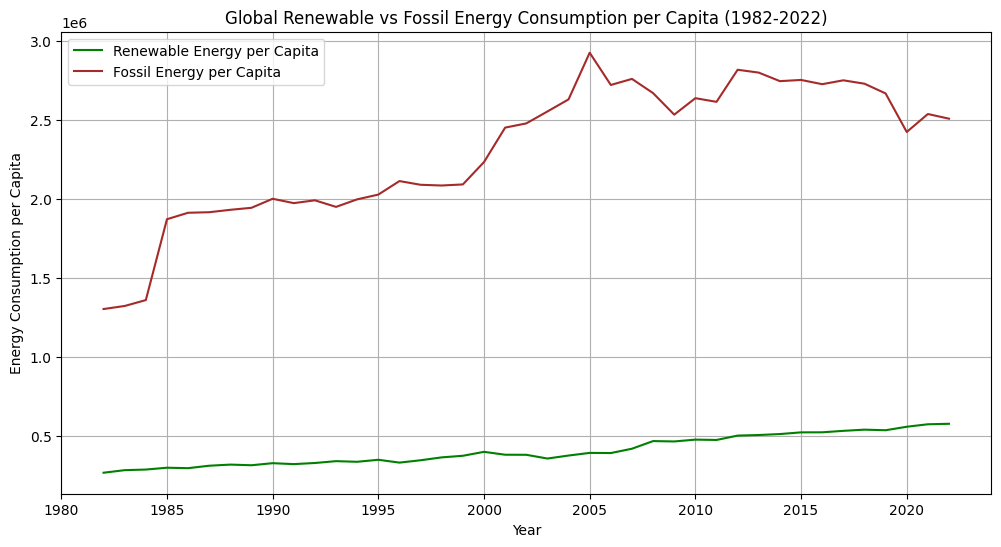

In [30]:
#for each year, calculate global total renewable and fossil energy consumption per capita
global_trends = df.groupby('year').agg({'renewables_energy_per_capita':'sum',
                                       'fossil_energy_per_capita':'sum'}).reset_index()
global_trends.head()

#make a plot of global trends
plt.figure(figsize=(12,6)) 
plt.plot(global_trends['year'], global_trends['renewables_energy_per_capita'], label='Renewable Energy per Capita', color='green')
plt.plot(global_trends['year'], global_trends['fossil_energy_per_capita'], label='Fossil Energy per Capita', color='brown')
plt.title('Global Renewable vs Fossil Energy Consumption per Capita (1982-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita')
plt.legend()
plt.grid()
plt.show()
